In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import  matplotlib.font_manager
import seaborn as sns
import sweetviz as sv
from scipy.stats import norm

%matplotlib inline
palette = ['#355C7D','#6C5B7B', '#C06C84','#F8B195', '#F67280']
sns.set_palette(sns.color_palette(palette))

In [112]:
df = pd.read_csv('Training Dataset.csv')

In [113]:
#drop rows having null values in the target variable
df.dropna(axis= 'rows', subset= ['class'], inplace= True)
#drop last two autogenerated columns 
df.drop(columns= df.iloc[:,18:].columns, inplace= True)

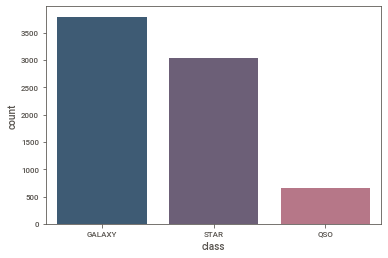

In [114]:
sns.countplot(x= 'class', data= df)

In [115]:
#remove rerun and objid

df.drop(columns= ['objid', 'rerun'], inplace= True)

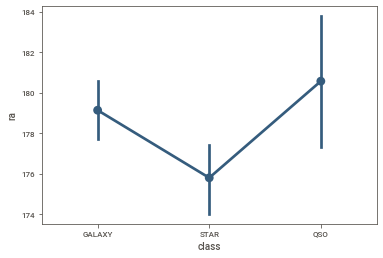

In [116]:
#bi-variate analysis
#relation with Right Ascension 
sns.pointplot(x= 'class', y= 'ra', data= df)

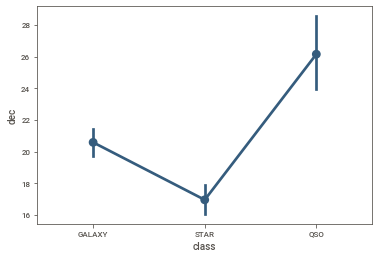

In [117]:
#Relation with declination
sns.pointplot(x= 'class', y= 'dec', data= df)

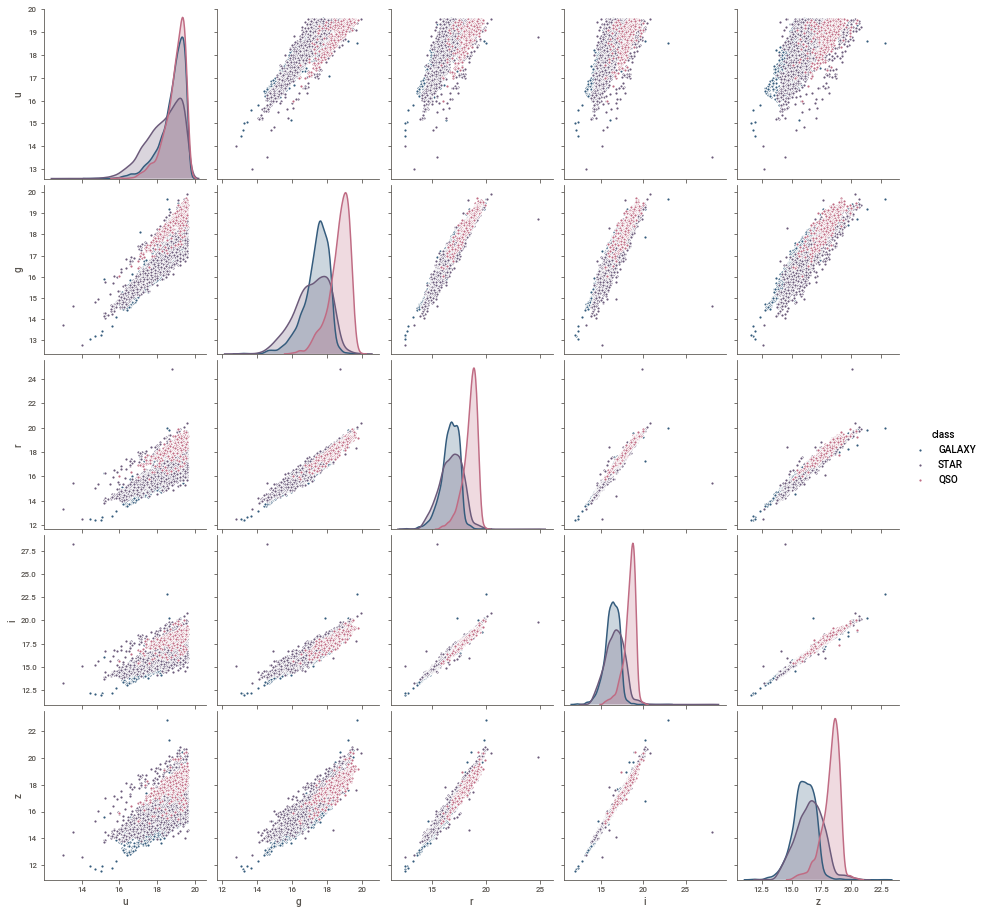

In [118]:
#all theun's variable have high corelation
#so analyse them collectively

sns.pairplot(df, hue= 'class', vars= ['u', 'g', 'r', 'i', 'z'])

In [119]:
#g, r, i ,z are highly correlated so we'll take only 'g'
df.drop(columns= ['r', 'i', 'z'], inplace= True)

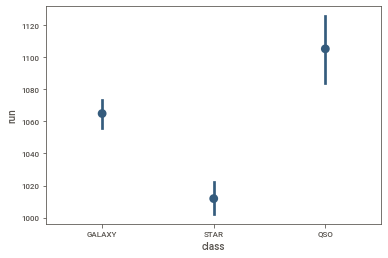

In [120]:
sns.pointplot(x= 'class', y= 'run', data= df, join= False)

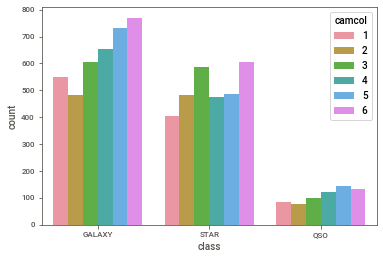

In [121]:
df['camcol'] = df['camcol'].astype('int')
sns.countplot(hue= 'camcol', x='class', data= df)

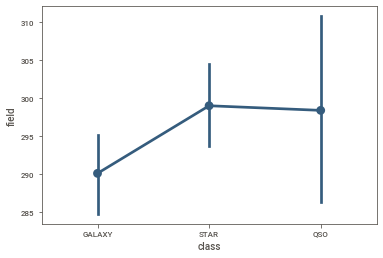

In [122]:
sns.pointplot(x= 'class', y= 'field', data= df)

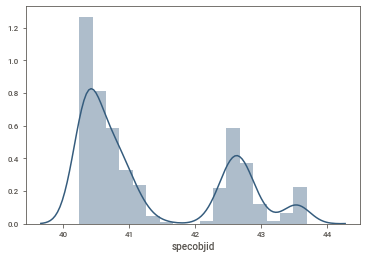

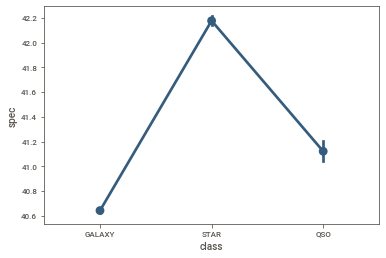

In [123]:
sns.distplot(np.log(df['specobjid']))
plt.show()
df_xyz = df
df_xyz['spec'] = np.log(df['specobjid'])
sns.pointplot(x= 'class', y= 'spec', data= df_xyz)

#Dont use this for now but review it again!!!!!!!!!!!!!!!!!
df.drop(columns= ['specobjid'], inplace= True)

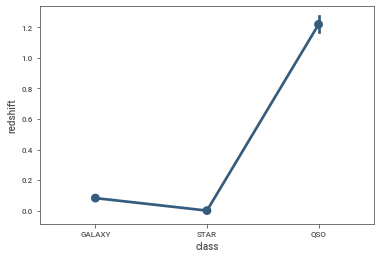

In [124]:
sns.pointplot(x= 'class', y='redshift', data= df)

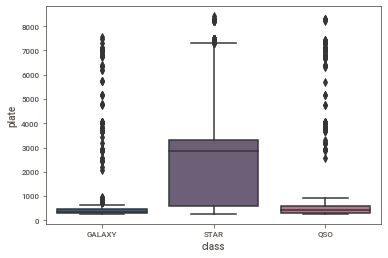

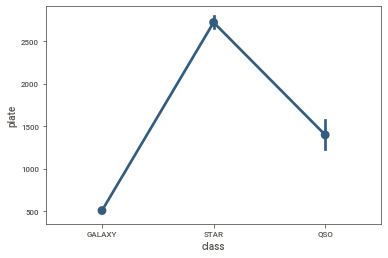

In [125]:
sns.boxplot(x= 'class', y= 'plate', data= df)
plt.show()
sns.pointplot(x= 'class', y= 'plate', data= df)

In [126]:
#since plate and fiberid are IDs. So dropping them
df.drop(columns= ['plate', 'fiberid'],inplace= True)

#including mjd will transform it in a time series problem
#keeping it out for now but definetly inlcude it later!!!!!!!!!!!!!!!!!
df.drop(columns = ['mjd'], inplace= True)

In [127]:
df['class'].replace({'STAR': 0, 'GALAXY': 1, 'QSO': 2}, inplace= True)
df['class_num'] = df['class'].astype('int')
df.drop(columns= ['class'], inplace= True)
df.info()

feature_config = sv.FeatureConfig(force_num= ['class_num'])
my_report = sv.analyze([df, 'Train'], target_feat= 'class_num', feat_cfg= feature_config)

my_report.show_html('EDA.html')

:TARGET::                          |█▉                   | [  9%]   00:00  -> (00:00 left)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7496 entries, 0 to 7495
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ra         7496 non-null   float64
 1   dec        7496 non-null   float64
 2   u          7496 non-null   float64
 3   g          7496 non-null   float64
 4   run        7496 non-null   float64
 5   camcol     7496 non-null   int32  
 6   field      7496 non-null   float64
 7   redshift   7496 non-null   float64
 8   spec       7496 non-null   float64
 9   class_num  7496 non-null   int32  
dtypes: float64(8), int32(2)
memory usage: 905.6 KB


:FEATURES DONE:                    |█████████████████████| [100%]   00:04  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [128]:
df.drop(columns= ['dec', 'spec', 'run'], inplace= True)

In [129]:
#Prepare feature and target variables
from sklearn.preprocessing import StandardScaler
df['camcol'] = df['camcol'].astype('category')
df = pd.get_dummies(df, columns= ['camcol'], prefix= 'camcol')


X = df.drop(columns= ['class_num'])
y = df['class_num']   


<class 'pandas.core.frame.DataFrame'>
Int64Index: 6856 entries, 1 to 7495
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        6856 non-null   float64
 1   u         6856 non-null   float64
 2   g         6856 non-null   float64
 3   field     6856 non-null   float64
 4   redshift  6856 non-null   float64
 5   camcol_1  6856 non-null   uint8  
 6   camcol_2  6856 non-null   uint8  
 7   camcol_3  6856 non-null   uint8  
 8   camcol_4  6856 non-null   uint8  
 9   camcol_5  6856 non-null   uint8  
 10  camcol_6  6856 non-null   uint8  
dtypes: float64(5), uint8(6)
memory usage: 361.5 KB


C:\Users\Aman\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Aman\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Aman\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


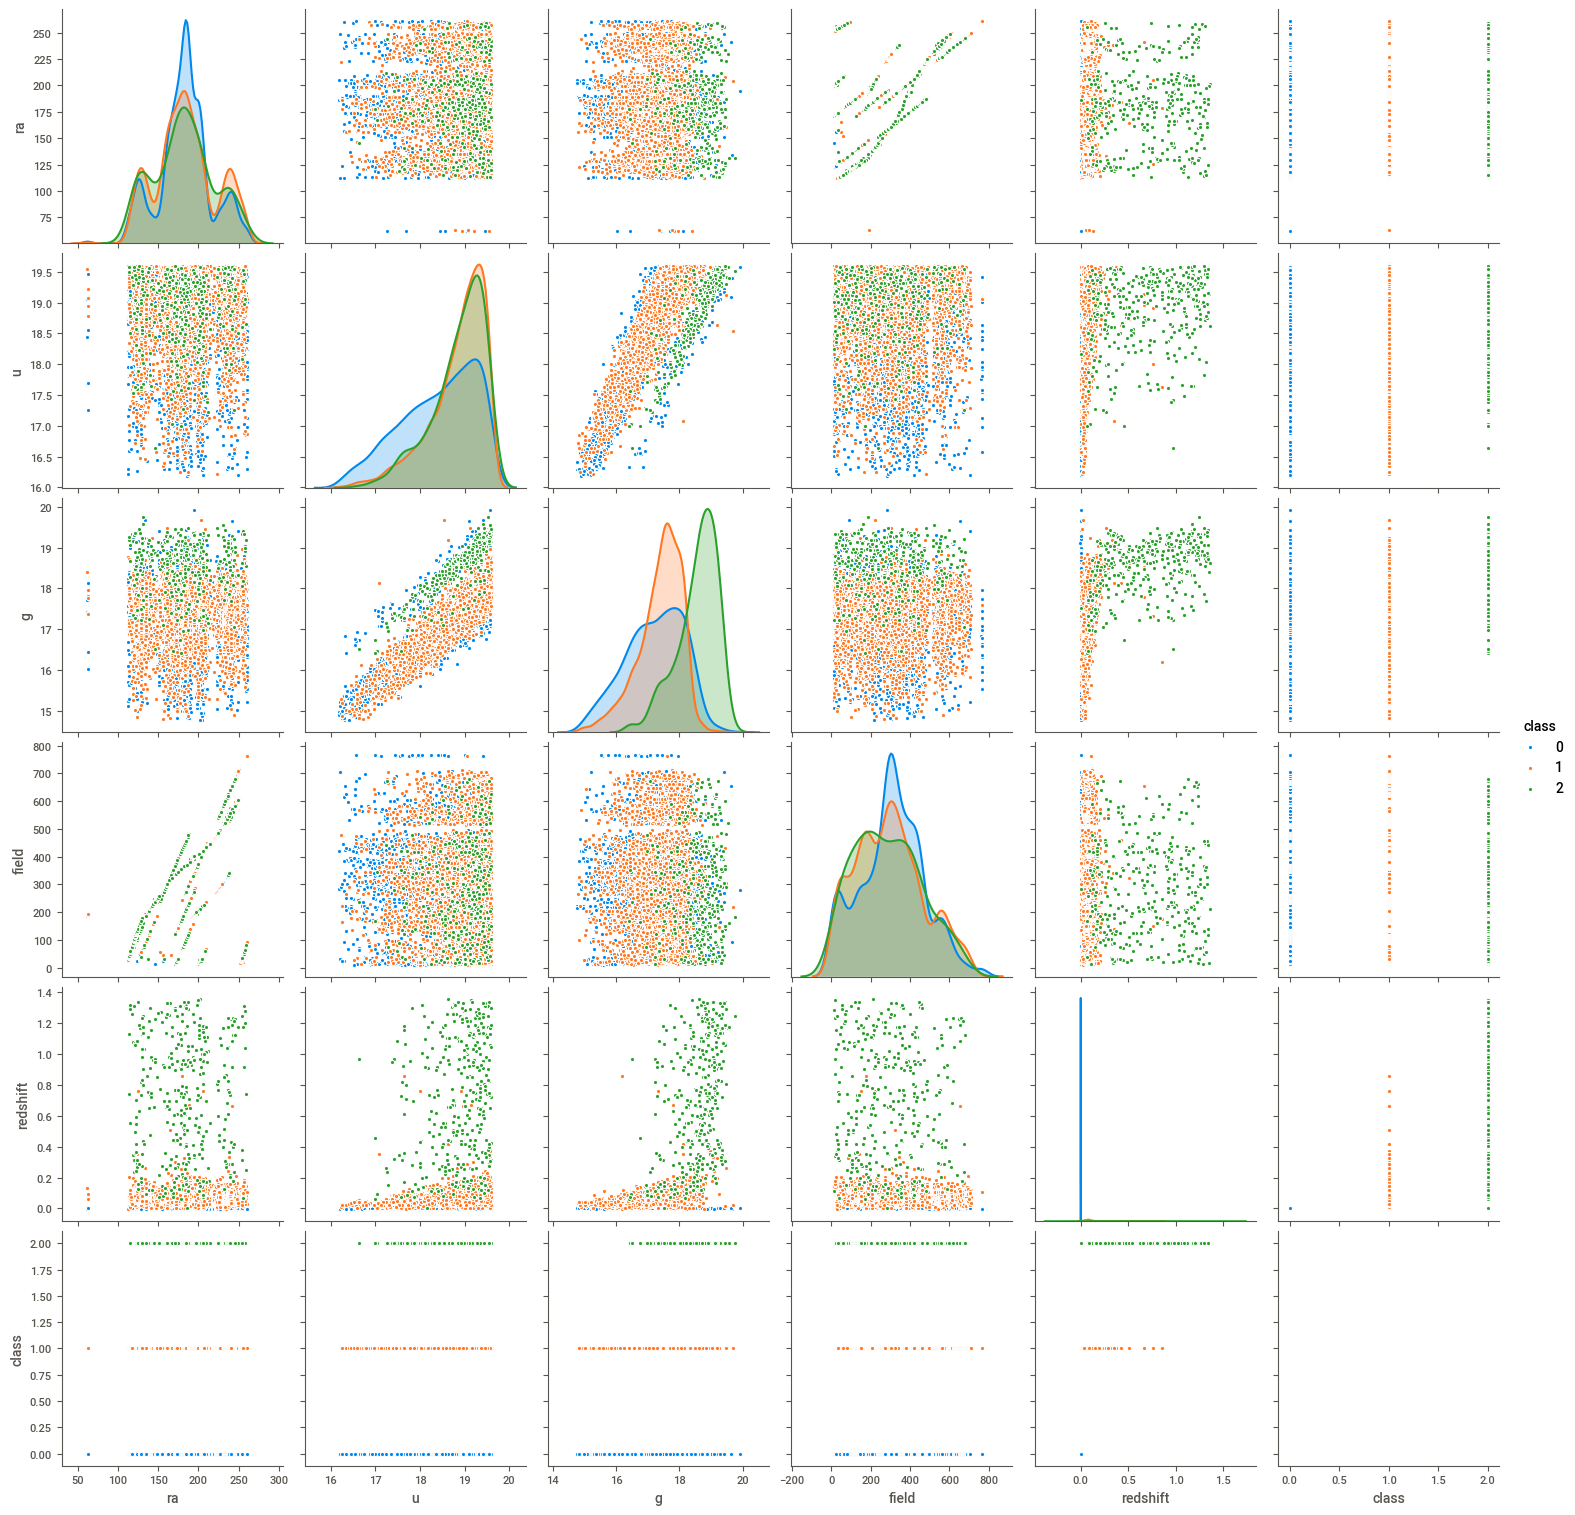

In [130]:
#Handling outliers 
#for 'ra' column
ra_mean = X['ra'].mean()
ra_std = X['ra'].std()
ra_mask = (X['ra'] > (ra_mean - 3*ra_std)) & (X['ra'] < (ra_mean + 3*ra_std))
X = X[ra_mask]
y = y[ra_mask]

#for 'u' column
u_mean = X['u'].mean()
u_std = X['u'].std()
u_mask = (X['u'] > (u_mean - 3*u_std)) & (X['u'] < (u_mean + 3*u_std))
X = X[u_mask]
y = y[u_mask]

#for 'g' column
g_mean = X['g'].mean()
g_std = X['g'].std()
g_mask = (X['g'] > (g_mean - 3*g_std)) & (X['g'] < (g_mean + 3*g_std))
X = X[g_mask]
y = y[g_mask]

#for 'field' column
field_mean = X['field'].mean()
field_std = X['field'].std()
field_mask = (X['field'] > (field_mean - 3*field_std)) & (X['field'] < (field_mean + 3*field_std))
X = X[field_mask]
y = y[field_mask]

#for 'redshift' column
rs_mean = X['redshift'].mean()
rs_std = X['redshift'].std()
rs_mask = (X['redshift'] > (rs_mean - 3*rs_std)) & (X['redshift'] < (rs_mean + 3*rs_std))
X = X[rs_mask]
y = y[rs_mask]


X.info()
X['class'] = y
sns.pairplot(X, vars= ['ra', 'u', 'g', 'field', 'redshift', 'class'], hue= 'class')
X.drop(columns= ['class'], inplace= True)

In [131]:
# Scale the training data

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(df.drop(columns= ['class_num'])), columns= df.drop(columns= ['class_num']).columns)
y = df['class_num']

In [159]:
y.head()

0    1
1    0
2    0
3    1
4    2
Name: class_num, dtype: int32

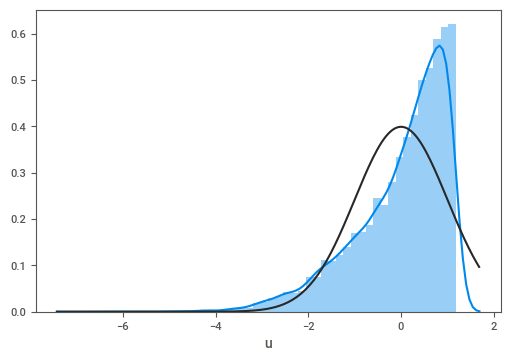

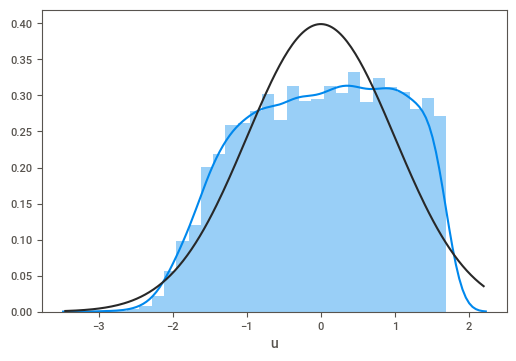

In [132]:
#Transform data that is too deviated from normal distribution
from sklearn.preprocessing import PowerTransformer
log = PowerTransformer()

sns.distplot(X['u'], fit= norm)
plt.show()
X['u'] = log.fit_transform(X[['u']])
sns.distplot(X['u'], fit= norm)

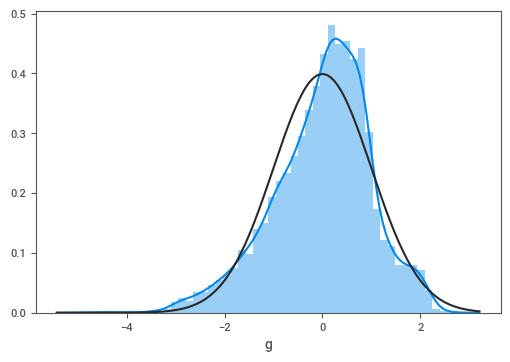

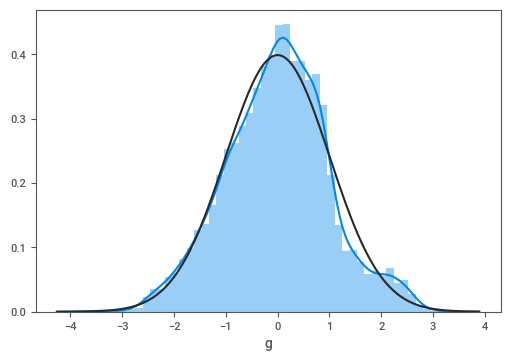

In [133]:
sns.distplot(X['g'], fit=norm)
plt.show()
X['g'] = log.fit_transform(X[['g']])
sns.distplot(X['g'], fit= norm)

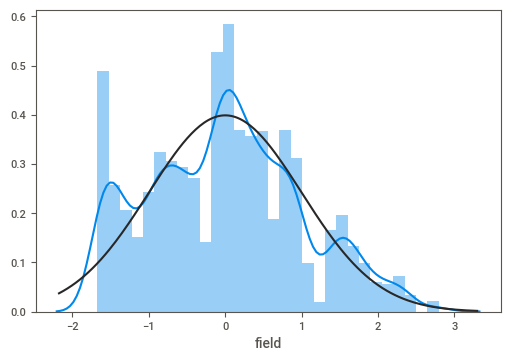

In [134]:
sns.distplot(X['field'], fit= norm)

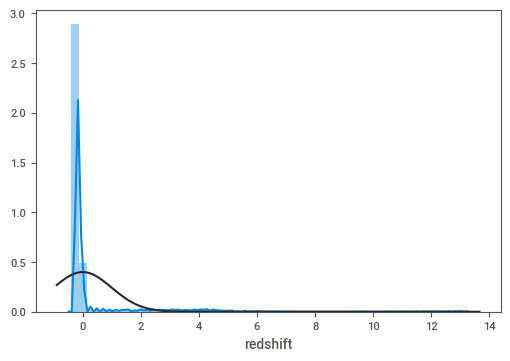

In [135]:
sns.distplot(X['redshift'], fit= norm)

In [136]:
# metrics used
from sklearn.metrics import classification_report

def wt_f1(y_true, y_pred):
    score = classification_report(y_true, y_pred, output_dict= True)['weighted avg']['f1-score']
    return score

In [137]:
# model testing
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, stratify= y, random_state= 20)

# model validation function
def MV(model, param_dict, features= X, target= y, scorer= accuracy_score):
    metric = make_scorer(scorer)
    rscv = RandomizedSearchCV(model, param_distributions= param_dict, n_iter= 25, scoring= metric, cv= 5, random_state= 40,\
                              n_jobs= -1, return_train_score= True)
    
    rscv.fit(features, target)
    
    print("Cross-validated train scores:", rscv.cv_results_['mean_train_score'][0:6])
    
    print("Cross-validated test scores:", rscv.cv_results_['mean_test_score'][:6])
    
    print("Best test score:{:.2f}".format(rscv.best_score_))

In [138]:
# KNN model
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier()
param_dict_knn = {
    'n_neighbors': np.arange(20,500, 5),
    'weights': ['uniform', 'distance']
}

MV(KNN, param_dict= param_dict_knn, scorer= wt_f1)
#investigate which parameters are leading to overfitting

Cross-validated train scores: [0.62013086 1.         0.60952576 1.         1.         1.        ]
Cross-validated test scores: [0.58689133 0.69692216 0.56559634 0.66215396 0.58331456 0.58767392]
Best test score:0.70


In [139]:
#Logistic regression
from sklearn.linear_model import SGDClassifier

logreg = SGDClassifier(loss= 'log', random_state= 20)

param_dict_lr = {
    'alpha': np.arange(0.001, 100, 0.01)
}

MV(logreg, param_dict= param_dict_lr, scorer= wt_f1)

Cross-validated train scores: [0.34024813 0.34024813 0.34024813 0.34024813 0.34024813 0.34024813]
Cross-validated test scores: [0.34017407 0.34017407 0.34017407 0.34017407 0.34017407 0.34017407]
Best test score:0.34


In [140]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state= 20)

param_dict_rfc = {
    'n_estimators': np.arange(2, 1000, 1),
    'max_depth': np.arange(5, 50, 1),
    "min_samples_leaf": np.arange(0.001, 0.8, 0.001),
    "max_features": np.arange(1, 11, 1)
}

MV(rfc, param_dict= param_dict_rfc, scorer= wt_f1)

Cross-validated train scores: [0.98780931 0.7960172  0.86789527 0.34017401 0.96322386        nan]
Cross-validated test scores: [0.98669459 0.79587886 0.86779821 0.34017407 0.96189567        nan]
Best test score:0.99


In [141]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(random_state= 20)

param_dict_gbc = {
    'n_estimators': np.arange(1, 500, 10),
    'max_depth': np.arange(3, 50, 1),
    'min_samples_leaf': np.arange(0.001, 0.2, 0.001),
    'subsample': np.arange(0.1, 1.1, 0.1)
}

MV(gbc, param_dict= param_dict_gbc, scorer= wt_f1)

Cross-validated train scores: [0.94551598 0.92399347 0.34017401 0.93879031 0.95925596 0.97818792]
Cross-validated test scores: [0.93886648 0.91986923 0.34017407 0.93940357 0.95285224 0.97291144]
Best test score:0.99


In [142]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective= 'multi:softmax')

param_dict_xgb = {
    'eta': np.arange(0.1, 1, 0.1),
    'gamma': np.arange(0, 100, 1),
    'max_depth': np.arange(1, 20, 1),
    'subsample': np.arange(0.05, 1, 0.05),
    'colsample_bytree': np.arange(0.1, 1, 0.1)
}

MV(xgb_clf, param_dict= param_dict_xgb, scorer= wt_f1)

Cross-validated train scores: [0.98752755 0.98714301 0.98751066 0.98665971 0.98801354 0.98764158]
Cross-validated test scores: [0.98628228 0.9872037  0.98524854 0.98535465 0.98644097 0.98723835]
Best test score:0.99


In [153]:
#Test data
df_test = pd.read_csv("testing Dataset.csv")
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   objid        2504 non-null   float64
 1   ra           2504 non-null   float64
 2   dec          2504 non-null   float64
 3   u            2504 non-null   float64
 4   g            2504 non-null   float64
 5   r            2504 non-null   float64
 6   i            2504 non-null   float64
 7   z            2504 non-null   float64
 8   run          2504 non-null   float64
 9   rerun        2504 non-null   float64
 10  camcol       2504 non-null   float64
 11  field        2504 non-null   float64
 12  specobjid    2504 non-null   float64
 13  redshift     2504 non-null   float64
 14  plate        2504 non-null   float64
 15  mjd          2504 non-null   float64
 16  fiberid      2504 non-null   float64
 17  class        0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
dtypes: fl

In [144]:
#drop autogenerated columns
df_test.drop(columns= df_test.iloc[:,17:], inplace= True)

#drop null values
df_test.dropna(how= 'any', axis= 0, inplace= True)

df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2504 entries, 0 to 2503
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      2504 non-null   float64
 1   ra         2504 non-null   float64
 2   dec        2504 non-null   float64
 3   u          2504 non-null   float64
 4   g          2504 non-null   float64
 5   r          2504 non-null   float64
 6   i          2504 non-null   float64
 7   z          2504 non-null   float64
 8   run        2504 non-null   float64
 9   rerun      2504 non-null   float64
 10  camcol     2504 non-null   float64
 11  field      2504 non-null   float64
 12  specobjid  2504 non-null   float64
 13  redshift   2504 non-null   float64
 14  plate      2504 non-null   float64
 15  mjd        2504 non-null   float64
 16  fiberid    2504 non-null   float64
dtypes: float64(17)
memory usage: 352.1 KB


In [145]:
#Drop columns that are not in train set
to_drop = [columns for columns in df_test.columns if columns not in X.columns]
#take camcol out from to_drop
to_drop.remove('camcol')
print(to_drop,"\n", X.columns)

df_test.drop(columns= to_drop, inplace= True)
df_test.info()

['objid', 'dec', 'r', 'i', 'z', 'run', 'rerun', 'specobjid', 'plate', 'mjd', 'fiberid'] 
 Index(['ra', 'u', 'g', 'field', 'redshift', 'camcol_1', 'camcol_2', 'camcol_3',
       'camcol_4', 'camcol_5', 'camcol_6'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2504 entries, 0 to 2503
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ra        2504 non-null   float64
 1   u         2504 non-null   float64
 2   g         2504 non-null   float64
 3   camcol    2504 non-null   float64
 4   field     2504 non-null   float64
 5   redshift  2504 non-null   float64
dtypes: float64(6)
memory usage: 136.9 KB


In [146]:
#one hot encoding of 'camcol'

df_test['camcol'] = df_test['camcol'].astype('int')
df_test = pd.get_dummies(df_test, columns= ['camcol'], prefix= 'camcol')
    
df_test.columns == X.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [147]:
#Scale the test data with the scaler that is already fitted on train data

X_test = pd.DataFrame(scaler.transform(df_test), columns= df_test.columns)

In [160]:
print(X.describe())
print(X_test.describe())

#save data for final evaluation
X.to_csv('final train features.csv', index= False)
y.to_csv('final train target.csv', index= False)
X_test.to_csv('final test features.csv', index= False)

                 ra             u             g         field      redshift  \
count  7.496000e+03  7.496000e+03  7.496000e+03  7.496000e+03  7.496000e+03   
mean   5.465212e-17  3.606448e-18  1.895051e-17 -1.540331e-16  2.477859e-17   
std    1.000067e+00  1.000067e+00  1.000067e+00  1.000067e+00  1.000067e+00   
min   -3.715087e+00 -2.949504e+00 -3.749936e+00 -1.672137e+00 -3.882071e-01   
25%   -3.685097e-01 -8.028654e-01 -6.546680e-01 -7.754564e-01 -3.775632e-01   
50%    1.017193e-01  4.645521e-02  2.887634e-02  1.503843e-02 -2.599303e-01   
75%    5.057654e-01  8.454501e-01  6.491525e-01  6.816498e-01 -1.353112e-01   
max    1.816565e+00  1.697044e+00  3.381412e+00  2.793569e+00  1.315211e+01   

           camcol_1      camcol_2      camcol_3      camcol_4      camcol_5  \
count  7.496000e+03  7.496000e+03  7.496000e+03  7.496000e+03  7.496000e+03   
mean   1.348337e-15  1.658862e-15 -9.626327e-16 -1.994491e-15  4.828552e-15   
std    1.000067e+00  1.000067e+00  1.000067e+00  1.

In [156]:
#XGboost is the final model I choose


"""import xgboost as xgb

xgb_clf = xgb.XGBClassifier(objective= 'multi:softmax')

param_dict_xgb = {
    'eta': np.arange(0.1, 1, 0.1),
    'gamma': np.arange(0, 100, 1),
    'max_depth': np.arange(1, 20, 1),
    'subsample': np.arange(0.05, 1, 0.05),
    'colsample_bytree': np.arange(0.1, 1, 0.1)
}

MV(xgb_clf, param_dict= param_dict_xgb, scorer= wt_f1)"""


2504